In [2]:
import pandas as pd

df = pd.read_csv('Instagram.csv')


In [3]:
df

,reviewId,content,score
0,fcb52c61-c863-4a4a-b5d7-a69da1fe4af2,"GG,s",5
1,7627dc09-30d1-4cfb-a5fa-27d94379c0ed,Good,1
2,fc64ee50-bd9f-45ee-8fd9-540f647ca23b,🌟,4
3,671f9e86-4146-447c-8c6a-5ff80e0da3da,Super🫂🫂🫂,5
4,da887c83-04b9-44c2-90e2-fba27917e8f0,Nice,5
...,...,...,...
9995,5a176d0d-3ccd-4faa-8c9a-bdfddf7ac3e0,My instagram is update and the message did Not...,5
9996,afb26c6c-f516-41f7-90aa-73f7fb67bec9,It's good but sometimes it cannot upload a vid...,3
9997,0780194c-f10a-4ab8-9542-79e6ed6fb3b8,good,5
9998,012a90fd-9a37-4cad-9800-15fe9d6a795a,🥰🥰😍 i like it at this instgram 👻,5


In [4]:
df = df.sample(200)

In [5]:
df

,reviewId,content,score
9386,cfcc9d3b-794c-4b9a-8d11-c723b4d84ceb,Like that's a serious issue Instagram team. Wh...,1
9860,6eed703e-db59-485b-8c71-188b02186e5f,Best app!!!!,5
2797,61be4aa6-0306-4556-9d8a-51cc92d8e3ae,Hate the new update where it doesn't let you s...,1
833,7ceb3888-62c6-4a21-880a-0f1d7f66a337,i wanna to make some changes ...,5
9596,7fe0cab0-fb16-47c9-a2c7-133af7d9938e,Nice,5
...,...,...,...
3344,0370dcdd-1ca5-4f23-ae27-ca73f2795bd8,Very interesting app ❤️,5
102,463905f3-387a-40e1-bd20-fa90abdc8e5f,It's great,5
7303,cb52bf82-fd13-4b7e-a2be-e963fe08e36d,Fabulous,5
1125,8cd11573-3bd8-4d72-a5c6-50d3f28d9876,Good 😊,5


In [6]:
from transformers import pipeline 
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

texts = list(df.content.values)

results = nlp(texts)


Device set to use cpu


In [7]:
for text, result, score in zip(texts, results, df.score.values):
    print('Text:', text)
    print('Result:', result)
    print('Score:', score)

Text: Like that's a serious issue Instagram team. Why your security and supporrting system is so bad? My accounr was hacked and I could do nothing to recover and the account had lots of chats and stuffs kindly kindly improve it and I pray to anyone to not face it.
Result: {'label': 'NEGATIVE', 'score': 0.999639630317688}
Score: 1
Text: Best app!!!!
Result: {'label': 'POSITIVE', 'score': 0.9997368454933167}
Score: 5
Text: Hate the new update where it doesn't let you screenshot photos
Result: {'label': 'NEGATIVE', 'score': 0.9947570562362671}
Score: 1
Text: i wanna to make some changes ...
Result: {'label': 'NEGATIVE', 'score': 0.8938980102539062}
Score: 5
Text: Nice
Result: {'label': 'POSITIVE', 'score': 0.9998552799224854}
Score: 5
Text: 3rd class app, you write in goid manners they pretend wrong and block account however you give feedback to review
Result: {'label': 'NEGATIVE', 'score': 0.9527530670166016}
Score: 1
Text: Very nice 😂
Result: {'label': 'POSITIVE', 'score': 0.99985778331

In [8]:
df['sentiment'] = [r['label'] for r in results]
df['sentiment_score'] = [r['score'] for r in results]




In [9]:
df

,reviewId,content,score,sentiment,sentiment_score
9386,cfcc9d3b-794c-4b9a-8d11-c723b4d84ceb,Like that's a serious issue Instagram team. Wh...,1,NEGATIVE,0.999640
9860,6eed703e-db59-485b-8c71-188b02186e5f,Best app!!!!,5,POSITIVE,0.999737
2797,61be4aa6-0306-4556-9d8a-51cc92d8e3ae,Hate the new update where it doesn't let you s...,1,NEGATIVE,0.994757
833,7ceb3888-62c6-4a21-880a-0f1d7f66a337,i wanna to make some changes ...,5,NEGATIVE,0.893898
9596,7fe0cab0-fb16-47c9-a2c7-133af7d9938e,Nice,5,POSITIVE,0.999855
...,...,...,...,...,...
3344,0370dcdd-1ca5-4f23-ae27-ca73f2795bd8,Very interesting app ❤️,5,POSITIVE,0.999376
102,463905f3-387a-40e1-bd20-fa90abdc8e5f,It's great,5,POSITIVE,0.999869
7303,cb52bf82-fd13-4b7e-a2be-e963fe08e36d,Fabulous,5,POSITIVE,0.999872
1125,8cd11573-3bd8-4d72-a5c6-50d3f28d9876,Good 😊,5,POSITIVE,0.999858


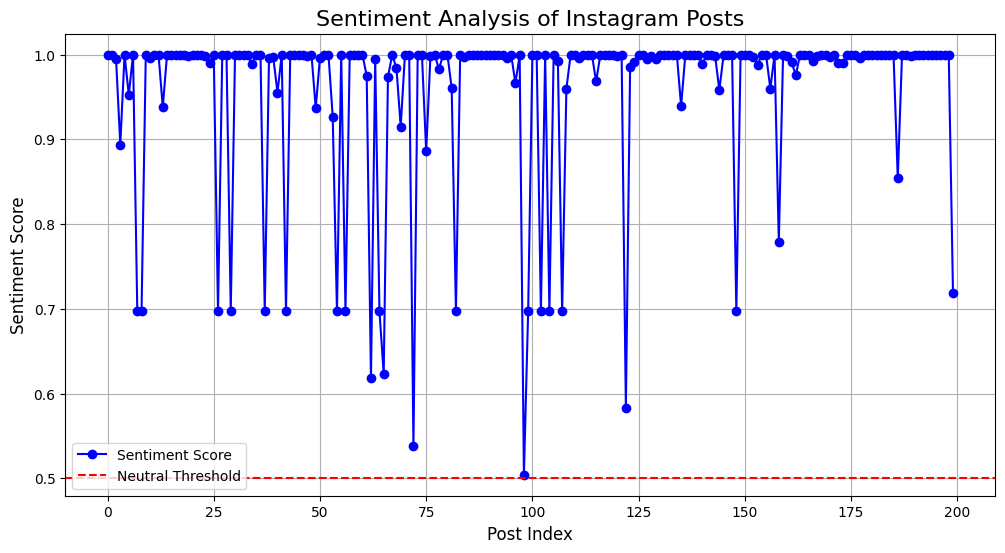

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(df)), df['sentiment_score'], label='Sentiment Score', color='blue', marker='o')
plt.title('Sentiment Analysis of Instagram Posts', fontsize=16)
plt.xlabel('Post Index', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.axhline(0.5, color='red', linestyle='--', label='Neutral Threshold')  # Reference line
plt.legend()
plt.grid()
plt.show()

